In [24]:
import matplotlib.pyplot as plt

import numpy as np
import densmap as dm
from matplotlib import cm
import scipy.optimize as opt
import scipy.ndimage.filters as snf

In [25]:
def moving_average(x, w):
    return snf.convolve1d(x, np.ones(w), mode='wrap') / w

In [26]:
# FP = dm.fitting_parameters( par_file='parameters_shear_pen.txt' )
FP = dm.fitting_parameters( par_file='parameters_shear_hex.txt' )
liq1 = 'SOL'
liq2 = 'HEX'
# liq2 = 'PEN'
file_root = 'flow_'

[densmap] Initializing fitting parameters data structure


In [27]:
""" Reading input """
folder_name = FP.folder_name
Lx = FP.lenght_x
Lz = FP.lenght_z
n_init = FP.first_stamp
n_fin = FP.last_stamp
dt = FP.time_step

In [28]:
""" Creating meshgrid """
density_array = dm.read_density_file(folder_name+'/'+file_root+liq1+'_{:05d}'.format(n_init)+'.dat', bin='y')
Nx = density_array.shape[0]
Nz = density_array.shape[1]
hx = Lx/Nx
hz = Lz/Nz
x = hx*np.arange(0.0,Nx,1.0, dtype=float)+0.5*hx
z = hz*np.arange(0.0,Nz,1.0, dtype=float)+0.5*hz
X, Z = np.meshgrid(x, z, sparse=False, indexing='ij')
ihalf = (Nx//2)+(Nx%2)
x_fold = hx*np.arange(0.0,Nx//2,1.0, dtype=float)+0.5*hx
z_fold = z
X_fold, Z_fold = np.meshgrid(x_fold, z_fold, sparse=False, indexing='ij')

In [29]:
n_dump = 10
density_array_sol_avg = np.zeros_like(density_array)
density_array_but_avg = np.zeros_like(density_array)
velx_array_avg = np.zeros_like(density_array)
velz_array_avg = np.zeros_like(density_array)

for idx in range(n_init, n_fin+1 ):
    
    if idx%n_dump==0 :
        print("Obtainig frame "+str(idx))
        t_label = str(dt*idx)+' ps'

    density_array = dm.read_density_file(folder_name+'/'+file_root+liq1+'_{:05d}'.format(idx)+'.dat', bin='y')
    
    density_x = np.mean(density_array,axis=1)
    xcom = np.sum(density_x*x)/np.sum(density_x)
    icom = int(np.round(xcom/hx))
    ishift = ihalf-icom
    
    density_array = np.roll(density_array, ishift, axis=0)
    density_array_sol_avg += density_array
    
    velx_array, velz_array = dm.read_velocity_file(folder_name+'/'+file_root+'{:05d}'.format(idx)+'.dat')
    velx_array = np.roll(velx_array, ishift, axis=0)
    velz_array = np.roll(velz_array, ishift, axis=0)
    
    velx_array_avg += velx_array
    velz_array_avg += velz_array
    
    density_array = dm.read_density_file(folder_name+'/'+file_root+liq2+'_{:05d}'.format(idx)+'.dat', bin='y')
    density_x = np.mean(density_array,axis=1)
    
    density_array = np.roll(density_array, ishift, axis=0)
    density_array_but_avg += density_array
    
    
density_array_sol_avg /= (n_fin-n_init+1)
density_array_but_avg /= (n_fin-n_init+1)
velx_array_avg /= (n_fin-n_init+1)
velz_array_avg /= (n_fin-n_init+1)

Obtainig frame 1250
Obtainig frame 1260
Obtainig frame 1270
Obtainig frame 1280
Obtainig frame 1290
Obtainig frame 1300
Obtainig frame 1310
Obtainig frame 1320
Obtainig frame 1330
Obtainig frame 1340
Obtainig frame 1350
Obtainig frame 1360
Obtainig frame 1370
Obtainig frame 1380
Obtainig frame 1390
Obtainig frame 1400
Obtainig frame 1410
Obtainig frame 1420
Obtainig frame 1430
Obtainig frame 1440
Obtainig frame 1450
Obtainig frame 1460
Obtainig frame 1470
Obtainig frame 1480
Obtainig frame 1490
Obtainig frame 1500
Obtainig frame 1510
Obtainig frame 1520
Obtainig frame 1530
Obtainig frame 1540
Obtainig frame 1550
Obtainig frame 1560
Obtainig frame 1570
Obtainig frame 1580
Obtainig frame 1590
Obtainig frame 1600
Obtainig frame 1610
Obtainig frame 1620
Obtainig frame 1630
Obtainig frame 1640
Obtainig frame 1650
Obtainig frame 1660
Obtainig frame 1670
Obtainig frame 1680
Obtainig frame 1690
Obtainig frame 1700
Obtainig frame 1710
Obtainig frame 1720
Obtainig frame 1730
Obtainig frame 1740


In [30]:
velocity_magnitude = np.sqrt(velx_array_avg*velx_array_avg+velz_array_avg*velz_array_avg)

In [31]:
(11/10)*7.4492753623188395e-6

8.194202898550723e-06

In [32]:
delta_lambda = 8.939130434782607e-06 # Ca=0.12
# delta_lambda = 8.194202898550723e-06 # Ca=0.11
# delta_lambda = 7.4492753623188395e-6 # Ca=0.10
# delta_lambda = 6.7043478260869555e-06 # Ca=0.09
# delta_lambda = 5.959420289855072e-06 # Ca=0.08
# delta_lambda = 5.214492753623188e-06 # Ca=0.07
# delta_lambda = 4.469565217391304e-06 # Ca=0.06
# delta_lambda = 3.7246376811594197e-06 # Ca=0.05
dt = 0.002
dx_res = 1.0
v_wall = dx_res*delta_lambda/dt
print("wall speed ", v_wall)

wall speed  0.004469565217391304


<IPython.core.display.Javascript object>


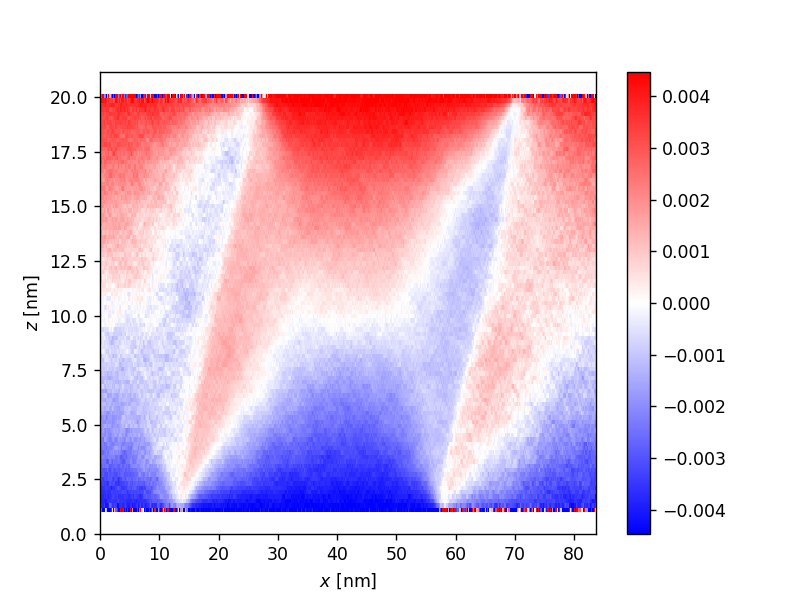

In [33]:
%matplotlib notebook

# plt.pcolormesh(X, Z, velocity_magnitude, cmap=cm.bwr,vmax=v_wall)
plt.pcolormesh(X, Z, velx_array_avg, cmap=cm.bwr,vmin=-v_wall,vmax=v_wall)
plt.tick_params(axis='both')
plt.ylabel(r'$z$ [nm]')
plt.xlabel(r'$x$ [nm]')
plt.colorbar()

plt.show()

In [34]:
z_profile = 1.3
idx_profile = int(z_profile/hz)
vx_x = velx_array_avg[:,idx_profile]
vz_x = velz_array_avg[:,idx_profile]

In [35]:
vx_x_smooth = moving_average(vx_x, 3)
vz_x_smooth = moving_average(vz_x, 3)

<IPython.core.display.Javascript object>


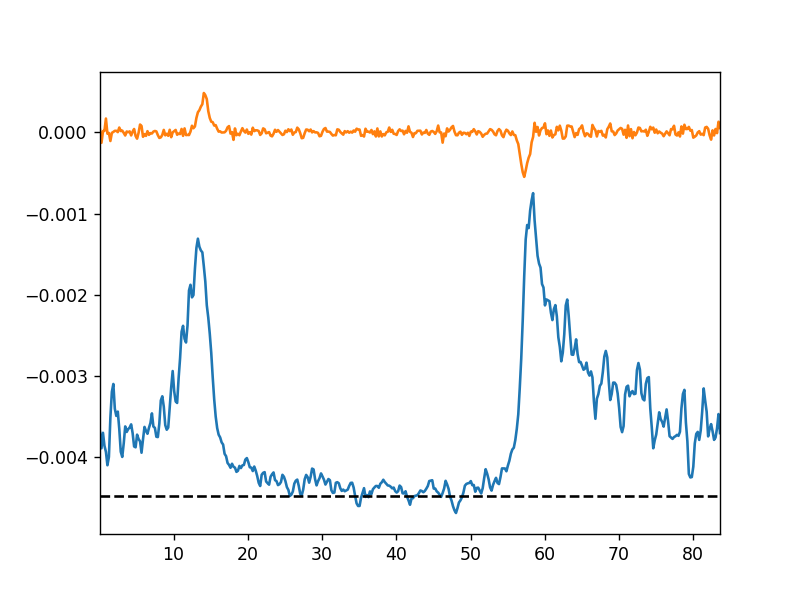

In [36]:
%matplotlib notebook

plt.plot(x,vx_x_smooth)
plt.plot(x,vz_x_smooth)
plt.plot(x,-v_wall*np.ones(x.shape),'k--')

plt.xlim([x[0],x[-1]])

plt.show()

In [37]:
win_half = 5
ix_centre = Nx//2
vx_z_sol = np.mean(velx_array_avg[ix_centre-win_half:ix_centre+win_half+1,:],axis=0)
vx_z_hex = 0.5*(np.mean(velx_array_avg[:win_half,:],axis=0)+np.mean(velx_array_avg[-win_half:,:],axis=0))

In [38]:
vx_z_sol_smooth = moving_average(vx_z_sol, 3)
vx_z_hex_smooth = moving_average(vx_z_hex, 3)

<IPython.core.display.Javascript object>


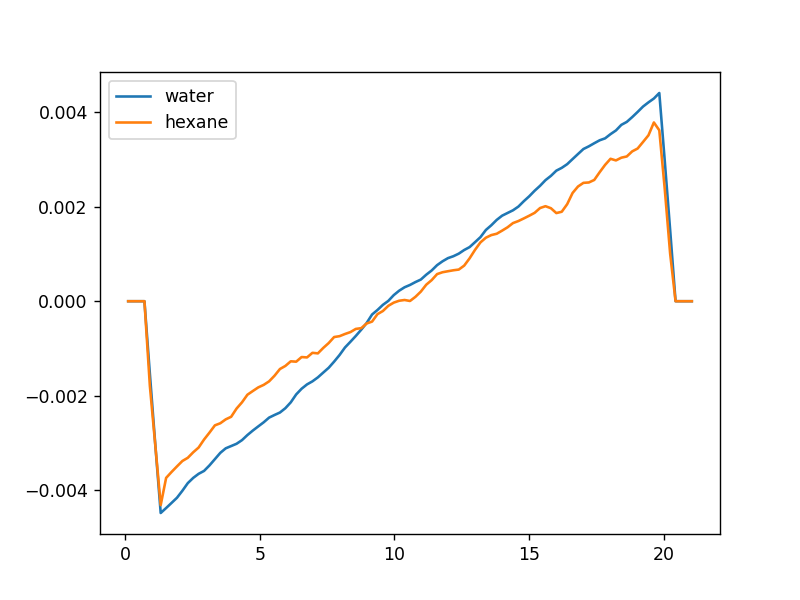

In [39]:
%matplotlib notebook

plt.plot(z,vx_z_sol_smooth,label='water')
plt.plot(z,vx_z_hex_smooth,label='hexane')
plt.legend()
# plt.plot(x,-v_wall*np.ones(x.shape),'k--')

# plt.xlim([x[0],x[-1]])

plt.show()

In [40]:
# np.savez("VelocityProfileHexane/"+folder_name+"_vx.npz",x,vx_x_smooth)
# np.savez("VelocityProfileHexane/"+folder_name+"_vz.npz",x,vz_x_smooth)

In [41]:
np.savez("VelocityProfileHexane/"+folder_name+"_vxz_wat.npz",z,vx_z_sol_smooth)
np.savez("VelocityProfileHexane/"+folder_name+"_vxz_hex.npz",z,vx_z_hex_smooth)